In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, norm, probplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import  train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor, Ridge, RANSACRegressor
from sklearn.ensemble import IsolationForest, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
sns.set_theme(color_codes=True)

# Data Familiarization

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
print('-'*40)
print('Train data size before removing ID feature: {}'. format(train.shape))
print('Test data size before removing ID feature: {}'. format(test.shape))
print('-'*40)

----------------------------------------
Train data size before removing ID feature: (1460, 81)
Test data size before removing ID feature: (1459, 80)
----------------------------------------


In [9]:
train_Id = train.pop('Id') # Removing Id
test_Id = test.pop('Id') # Removing Id

In [10]:
print('-'*40)
print('Train data size after removing ID feature: {}'. format(train.shape))
print('Test data size after removing ID feature: {}'. format(test.shape))
print('-'*40)

----------------------------------------
Train data size after removing ID feature: (1460, 80)
Test data size after removing ID feature: (1459, 79)
----------------------------------------


# Missing Data

In [11]:
na_list = []
for i in train.columns[:-1]:
    na = train[i].isnull().sum()
    test_na = test[i].isnull().sum()
    if na != 0 or test_na != 0:
        na_list.append([i, na, test_na])
        
na_df = pd.DataFrame(na_list, columns = ['Features', 'Null', 'Test Null'])
na_df.set_index('Features')
na_df['Total Null'] = na_df['Null'] + na_df['Test Null']

----------------------------------------
Total columns with Null Values:
34
----------------------------------------
Total Null Values:
13965
----------------------------------------


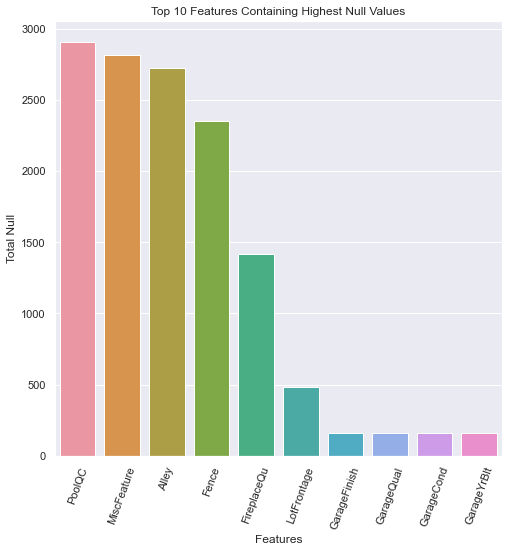

In [12]:
print('-'*40)
print('Total columns with Null Values:')
print(len(na_df))
print('-'*40)
print('Total Null Values:')
print(na_df['Total Null'].sum(axis = 0))
print('-'*40)
plt.figure(figsize = (8,8))
sns.set_palette(sns.color_palette('Set1', 8, .75))
sns.barplot(data = na_df.sort_values(by ='Total Null', ascending=False).head(10), x = 'Features', y = 'Total Null')
plt.title('Top 10 Features Containing Highest Null Values')
plt.xticks(rotation = 70)
plt.show()

In [13]:
x = np.round(na_df['Total Null'] * 100 / (len(train) + len(test)),3)
index = na_df['Features']
for i in na_df.index:
    print(index[i], '->', x[i], '% missing values')

MSZoning -> 0.137 % missing values
LotFrontage -> 16.65 % missing values
Alley -> 93.217 % missing values
Utilities -> 0.069 % missing values
Exterior1st -> 0.034 % missing values
Exterior2nd -> 0.034 % missing values
MasVnrType -> 0.822 % missing values
MasVnrArea -> 0.788 % missing values
BsmtQual -> 2.775 % missing values
BsmtCond -> 2.809 % missing values
BsmtExposure -> 2.809 % missing values
BsmtFinType1 -> 2.706 % missing values
BsmtFinSF1 -> 0.034 % missing values
BsmtFinType2 -> 2.741 % missing values
BsmtFinSF2 -> 0.034 % missing values
BsmtUnfSF -> 0.034 % missing values
TotalBsmtSF -> 0.034 % missing values
Electrical -> 0.034 % missing values
BsmtFullBath -> 0.069 % missing values
BsmtHalfBath -> 0.069 % missing values
KitchenQual -> 0.034 % missing values
Functional -> 0.069 % missing values
FireplaceQu -> 48.647 % missing values
GarageType -> 5.379 % missing values
GarageYrBlt -> 5.447 % missing values
GarageFinish -> 5.447 % missing values
GarageCars -> 0.034 % missing 

## Concatinating the train and test data:

We will be merging training and testing datasets in order to perform feature engineering.

In [14]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.pop('SalePrice')
df = pd.concat((train, test)).reset_index(drop=True)
print('-'*40)
print('Concatenated data shape: {}'. format(df.shape))
print('-'*40)

----------------------------------------
Concatenated data shape: (2919, 79)
----------------------------------------


In [15]:
# Top 10 columns with most unique features
df.nunique()[:10].sort_values(ascending=False)

LotArea        1951
LotFrontage     128
MSSubClass       16
LotConfig         5
MSZoning          5
LandContour       4
LotShape          4
Utilities         2
Alley             2
Street            2
dtype: int64

## Data Correlation:

Finding correlation between features

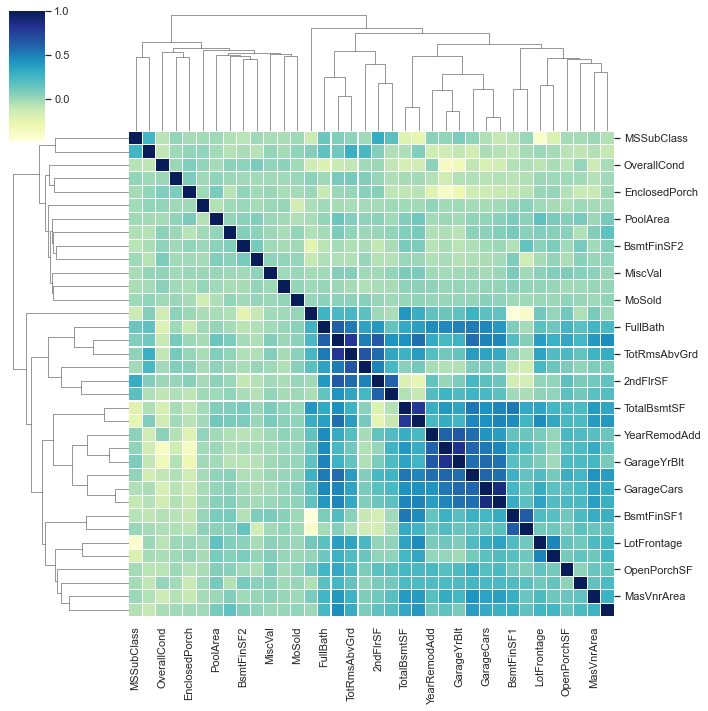

In [16]:
# Using cluster map with correlation
corrmat = df.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg

## Imputing Missing Values:

In this section, we will be imputing missing values based on the information provided about the features. We have already found the features having missing values above.

* **MSZoning**: Identifies the general zoning classification of the sale.

In [17]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

   Since **RL(Residential Low Density)** is the most common value, Therefore, we will fill it in Null values.

In [18]:
df['MSZoning'].fillna(value = df['MSZoning'].mode()[0], inplace = True)

* **LotFrontage (Linear feet of street connected to property)**: 
    We expect that LotFrontage is somewhat correlated to LotArea. Hence we will use Linear Regression to impute missing values.
    
   *We also manually filter out the outliers from the data*.

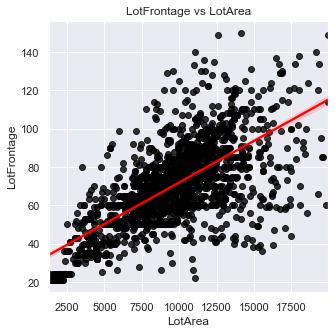

In [24]:
data = df[(~df['LotFrontage'].isnull()) & (df['LotFrontage'] <= 150) & (df['LotArea'] <= 20000)]
plt.figure(figsize = (5,5))
sns.regplot(data=data,x="LotArea",y="LotFrontage",scatter_kws={"color": "black"},  line_kws={'color': 'red'})
plt.ylabel("LotFrontage")
plt.xlabel("LotArea")
plt.title("LotFrontage vs LotArea")
plt.show()

In [20]:
# Using LinearRegression:
lin = LinearRegression()
lin_X = data['LotArea'].values.reshape(-1, 1)
lin_y = data['LotFrontage'].values
lin.fit(lin_X,lin_y)
for table in [df]:
    table['LotFrontage'].fillna(lin.intercept_ + table['LotArea'] * lin.coef_[0] , inplace=True)

* **Alley**: Data description says NA means **No alley access**

In [21]:
df['Alley'] = df['Alley'].fillna(value = 'None')

* **Utilities**: There is only data with NoSeWa, which is in Train dataset. Hence for more accuracy of our model we will
    fill missing values of test datasets with **NoSeWa**.

In [22]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
df['Utilities'].fillna(value = 'NoSeWa', inplace = True)

* **Exterior1st**: (Exterior covering on house)

  **Exterior2nd**: (Exterior covering on house (if more than one material))
    

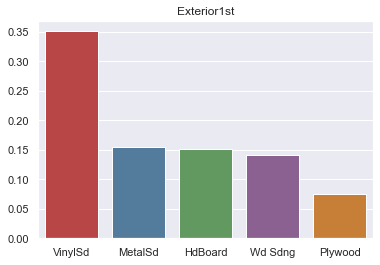

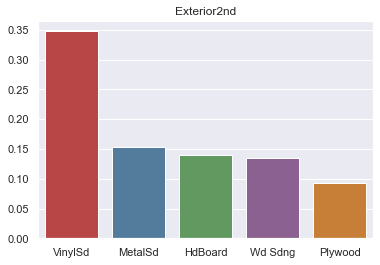

In [24]:
for i in ['Exterior1st','Exterior2nd']:
    value = df[i].value_counts(normalize=True).head(5)
    sns.set_palette("Set1", 8, .75)
    sns.barplot(x=value.index, y=value.values)
    plt.title(i)
    plt.show()
    print('\n')

   From the above bargraphs we notice that most of the cells of Exterior1st and Exterior2nd consists of **VinylSd**,
   therefore we will fill the missing values with mode, i.e., VinylSd

In [25]:
df['Exterior1st'].fillna(value = 'VinylSd', inplace = True)
df['Exterior2nd'].fillna(value ='VinylSd', inplace = True)

* **MasVnrType**:(Masonry veneer type)

  **MasVnrArea**: (Masonry veneer area in square feet)

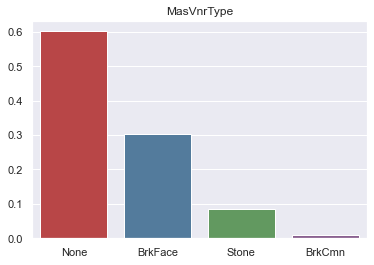

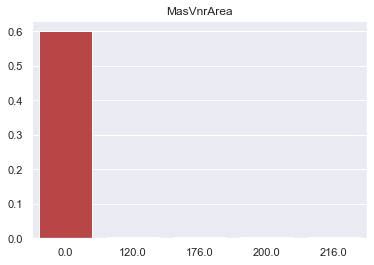

In [26]:
for i in ['MasVnrType','MasVnrArea']:
    value = df[i].value_counts(normalize=True).head(5)
    sns.barplot(x=value.index, y=value.values)
    sns.set_palette("Set1", 8, .75)
    plt.title(i)
    plt.show()
    print('\n')

From the above bargraphs we notice that most of the cells of MasVnrType and MasVnrArea consists of **None** and **0.0**, therefore we will fill the missing values with mode, i.e., None and 0.0

In [27]:
df['MasVnrType'].fillna(value = 'None', inplace = True)
df['MasVnrArea'].fillna(value = 0.0, inplace = True)

* **BsmtQual**: (Evaluates the height of the basement)
    
  **BsmtCond**: (Evaluates the general condition of the basement)
  
  **BsmtExposure**: (Refers to walkout or garden level walls)
  
  **BsmtFinType1**: (Rating of basement finished area)
  
  **BsmtFinType2**: (Rating of basement finished area (if multiple types))
  
  Data description says NA means **No Basement**

In [28]:
for col in ['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col].fillna(value = 'None', inplace=True)

* **BsmtFinSF1**: (Type 1 finished square feet)
  
  **BsmtFinSF2**: (Type 2 finished square feet)
  
  **BsmtUnfSF**: (Unfinished square feet of basement area)
  
  **TotalBsmtSF**: (Total square feet of basement area)

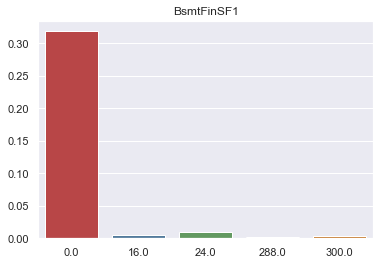

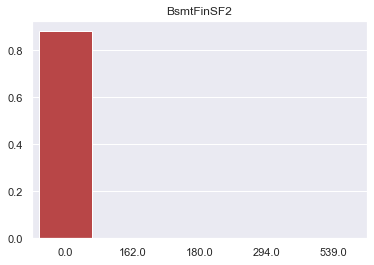

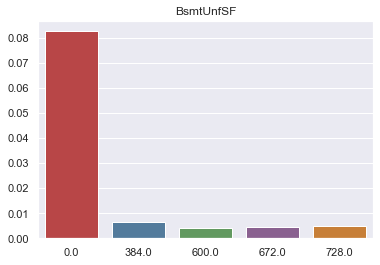

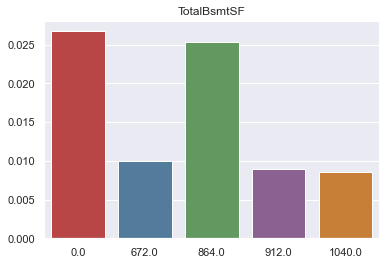

In [29]:
for i in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    value = df[i].value_counts(normalize=True).head(5)
    sns.barplot(x=value.index, y=value.values)
    sns.set_palette("Set1", 8, .75)
    plt.title(i)
    plt.show()
    print('\n')

From the above bargraphs, we may conclude that:

   * Most of the cells of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF consists of **0.0**, therefore we will fill the NA values   with the mode
   
   * NA cells of TotalBsmtSF will be filled with **mean**

In [30]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']:
    df[col].fillna(df[col].mode()[0], inplace = True)

df['TotalBsmtSF'].fillna(np.round(df['TotalBsmtSF'].mean(),0), inplace = True)

* **BsmtFullBath**: (Basement full bathrooms)

  **BsmtHalfBath**: (Basement half bathrooms)
  
Missing values are likely zero for not having a basement

In [31]:
df['BsmtFullBath'].fillna(value = 0.0, inplace = True)
df['BsmtHalfBath'].fillna(value = 0.0, inplace = True)

* **Electrical**: (Types of Electrical system)
  
  **KitchenQual**: (Kitchen quality)
  
  **Functional**: (Home functionality (Assume typical unless deductions are warranted))

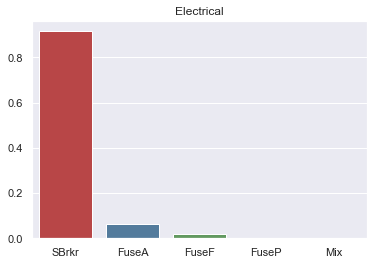

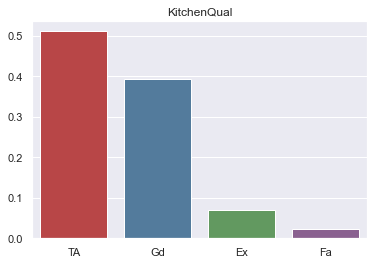

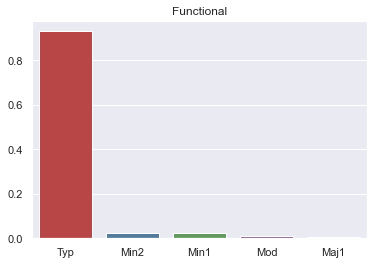

In [32]:
for i in ['Electrical', 'KitchenQual', 'Functional']:
    value = df[i].value_counts(normalize=True).head(5)
    sns.barplot(x=value.index, y=value.values)
    sns.set_palette("Set1", 8, .75)
    plt.title(i)
    plt.show()
    print('\n')

From the above bargraphs, we may conclude that Electrical, KitchenQual and Functional will be filled with mode values

In [33]:
for col in ['Electrical', 'KitchenQual', 'Functional']:
    df[col].fillna(df[col].mode()[0], inplace = True)

* **FireplaceQu**: (Fireplace quality)

Data description says NA values means **No Fireplace**

In [34]:
df['FireplaceQu'].fillna(value = 'None', inplace = True)

* **GarageType**: (Garage location)

  **GarageFinish**: (Interior finish of the garage)
  
  **GarageQual**: (Garage quality)
  
  **GarageCond**: (Garage condition)
  
Data description says NA values means **No Garage**

In [35]:
for col in ['GarageType', 'GarageFinish', 'GarageQual','GarageCond']:
    df[col].fillna(value = 'None', inplace = True)

* **GarageYrBlt**: (Year garage was built)

  **GarageCars**: (Size of garage in car capacity)
  
  **GarageArea**: (Size of garage in square feet)
  
Replacing missing values wih 0 (Since there are No Garage)

In [36]:
for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    df[col].fillna(value = 0, inplace = True)

* **PoolQC**: (Pool quality)

As per Data description NA means **No Pool**

In [37]:
df['PoolQC'].fillna(value = 'None', inplace = True)

* **Fence**: (Fence quality)

As per Data description NA means **No Fence**

In [38]:
df['Fence'].fillna(value = 'None', inplace = True)

* **MiscFeature**: (Miscellaneous feature not covered in other categories)

As per Data description NA means **None**

In [39]:
df['MiscFeature'].fillna(value = 'None', inplace = True)

* **SaleType**: (Type of sale)

Since there is only 1 NA value, therefore, we will fill the value with highest frequency with the help of mode

In [40]:
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)

##### Is there any remaining missing values?

In [41]:
#Check remaining missing values if any 
na_data = (df.isnull().sum() / len(df)) * 100
na_data = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :na_data})
missing_data.head()

,Missing Ratio


#### As there is no value in dataframe, it means no missing value.

In [42]:
# final df without missing values
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


# Feature Engineering

## Feature Creation & Transformation

There are many ways to increase our data, one of them is through creating combinations or ratio from the most relevant variables from the raw data. Since we have sufficient features and the main factor for the price is the size of the house, we will only add one extra feature in the existing dataset, i.e., **'TotalSF' (Total sqaure feet of a house)**.

We also transformed some features that are supposingly categorical but labelled as numerical as they are consisting of numbers.

In [43]:
# Creating column 'Total sqaure feet of a house'
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [44]:
# MSSubClass: Since it identifies the type of dwelling involved in the sale.
df['MSSubClass'] = df['MSSubClass'].apply(str)

# OverallQual: Since it rates the overall material and finish of the house.
df['OverallQual'] = df['OverallQual'].apply(str)

# OverallCond: Since it rates the overall condition of the house.
df['OverallCond'] = df['OverallCond'].apply(str)

# YearBuilt, GarageYrBlt, YearRemodAdd, MoSold & YrSold: The years and months is a categorical variable. 
#The ratio between two years is not meaningful which is why its not appropriate to classify it as a quantitative variable.
df['YearBuilt'] = df['YearBuilt'].astype(str)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)

## Feature Encoding

Many machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

### Categorical Features:

* ####  Ordinal Encoding

We use this method whenever our features has  an order (A is better than B) so that we can retain the information regarding the order.

In [49]:
# Encoding of columns wiith ratings, quality and conditions features

qual_dict = {'None': 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
bsmt_fin_dict = {'None': 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}

# ExterQual:
df["ExterQual"] = df["ExterQual"].map(qual_dict)
# ExterCond:
df["ExterCond"] = df["ExterCond"].map(qual_dict)
# BsmtQual:
df["BsmtQual"] = df["BsmtQual"].map(qual_dict)
# BsmtCond:
df["BsmtCond"] = df["BsmtCond"].map(qual_dict)
# HeatingQC
df["HeatingQC"] = df["HeatingQC"].map(qual_dict)
# PoolQC
df["PoolQC"] = df["PoolQC"].map(qual_dict)
# KitchenQual
df["KitchenQual"] = df["KitchenQual"].map(qual_dict)
# FireplaceQu
df["FireplaceQu"] = df["FireplaceQu"].map(qual_dict)
# GarageQual
df["GarageQual"] = df["GarageQual"].map(qual_dict)
# GarageCond
df["GarageCond"] = df["GarageCond"].map(qual_dict)


# BsmtFinType1:
df["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_dict)
# BsmtFinType2
df["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_dict)


# Fence
df["Fence"] = df["Fence"].map({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4 })
# BsmtExposure:
df["BsmtExposure"] = df["BsmtExposure"].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

* #### Label Encoding

We are using this method on rest of the categorical features of our dataset. Label encoding is helpful when there is no order in categorical features of the dataset.

In [50]:
# Categorical Features
categorical = []
for i in df.columns:
    if np.dtype(df[i]) == 'O':
        categorical.append(i)

# Numercial Features
numerical = []
for i in df.columns:
    if np.dtype(df[i]) != 'O':
        numerical.append(i)

print('-'*120)
print('Categorical Features:\n{}'.format(categorical))
print('-'*120)
print('Numerical Features:\n{}'.format(numerical))

------------------------------------------------------------------------------------------------------------------------
Categorical Features:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
------------------------------------------------------------------------------------------------------------------------
Numerical Features:
['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrS

In [51]:
# Label Encoding
labelencoder = LabelEncoder()        

for i in categorical:
    df[i] = labelencoder.fit_transform(df[i])

### Numerical Features:

* #### OneHot Encoder

We will be using **get_dummies()** method of pandas for encoding all the numerical features of the dataset.

In [52]:
# OneHot Encoding
df = pd.get_dummies(df,columns = numerical, drop_first = True)
print(df.shape)

(2919, 12703)


## Feature Transformation 

### Log-transformation of skewed target variable


 

**Log-transformation** is a technique used to perform Feature Transformation. It is one of the many techniques that can be used to transform the features so that they are treated equally.

**Why do we want models to treat them equally?**
It is because when we input these features to the model, there is a posibillity that an larger value in an imbalance feature will influence the result more and further affect the model performance. This is not something we will want as each and every row of data are equally important as a predictor.

We wouldn't want the model to prioritize predicting only data with higher sale prices. Hence, scaling and transforming is important for algorithms where distance between the data points is important.

We picked log-transformation here as it has the power to alter the skewness of a distribution towards normality. You can observe how log-transformation of a feature can transform its distribution and scale.


 mu = 180921.20 and sigma = 79415.29



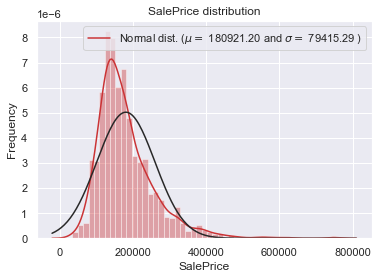

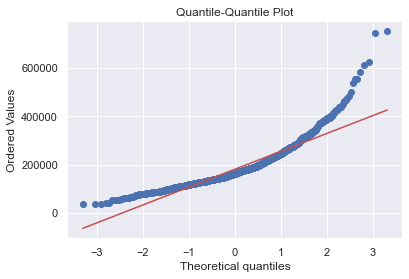

In [45]:
# Distribution plot of SalePrice
sns.set_palette("Set1", 8, .75)
sns.distplot(y_train , fit=norm);

(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot
fig = plt.figure()
res = probplot(y_train, plot=plt)
plt.title('Quantile-Quantile Plot')
plt.show()

The first plot is a distribution plot where we compare the distribution of our target variable with a normal distribution.
We can easily see it is right-skewed.

The Q-Q plot below plots the quantiles of our target feature against the quantiles of a normal distribution.
We can also easily see the skewness in the target feature.

Notice how it changes after we apply log transformation onto our feature.

In [46]:
# Log Transfromation
y = np.log1p(y_train)


 mu = 12.02 and sigma = 0.40



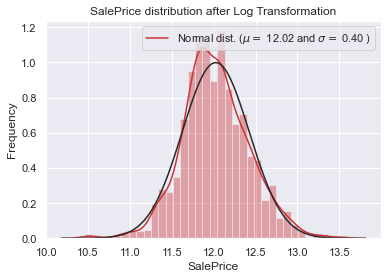

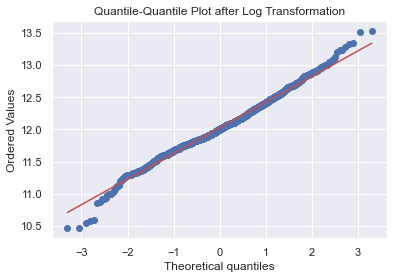

In [47]:
# Distribution plot of SalePrice after Log Transformation
sns.distplot(y , fit=norm);

(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution after Log Transformation')

# QQ-plot after Log Transformation
fig = plt.figure()
res = probplot(y, plot=plt)
plt.title('Quantile-Quantile Plot after Log Transformation')
plt.show()

We can now see the distribution plot are much closer to a normal distribution.

The Q-Q plot below also shows that the quantiles of our target feature and the quantiles of a normal distribution are much closer now.

### Log-Transformation of Skewed Features

We should also take care of the skewness of the features in our dataset. Just like the target feature, we will transform our dataset with the help of **numpy.log1p** which is nothing but **log(1+x)**.

In [53]:
df = np.log1p(df)

#### Splitting back the data in train and test:

We will be splitting back the dataset for training and testing before performing further transformations to stop the information from one dataset from flowing to the other and vice-versa.

In [54]:
df_train = df[:ntrain]
df_test = df[ntrain:]

In [55]:
print('-'*60)
print('Train data size after Feature Engineering: {}'. format(df_train.shape))
print('Test data size after Feature Engineering: {}'. format(df_test.shape))
print('-'*60)

------------------------------------------------------------
Train data size after Feature Engineering: (1460, 12703)
Test data size after Feature Engineering: (1459, 12703)
------------------------------------------------------------


# Feature Scaling

While log-transformation took care of the skewness in the features, we will also want to further scale the features to a standardize the range.

Of the many scaling choices such as **MinMaxScaler**, **StandardScaler**, we picked **RobustScaler**.

The reasoning behind this is because we have seen that our data seems to be quite skewed and it will tend to have more outliers than a normal dataset. Using a RobustScaler can deal with that easily as it uses statistics that are insensitive to outliers to scale the data.

A robust scaler minuses the median and divides it by the interquatile range. Both of which are not affected by the outliers.

In [56]:
for col in df[df.columns]:
        scaler = RobustScaler()
        df_train[col] = scaler.fit_transform(df_train[[col]])
        df_test[col] = scaler.transform(df_test[[col]])

# Feature Selection

Feature selection is a simple way to reduce redundant and irrelevant data from our dataset and some of them contribute close to nothing.
Removing the irrelevant data actually improves learning accuracy and greatly reduces the computation time. By removing redundant data, we can reduce the chance of our model overfitting to the data too.

There are some ways to perform features selection and some of which we surely studied before such as the Pearson’s Correlation and Analysis of Variance (ANOVA), etc. In this notebook, we will be using the mutual info regression to estimate the dependency of the variables with our target variable.

Mutual information is a non-negative value and it shows the dependency between the variables. Meaning a mutual information of 0 will be saying that both of the features are completely independent. Hence, it is a safe bet for us to remove them off. Note the other name of mutual information is information gain (you may have heard it before).

Mutual information from the field of information theory is the application of information gain to feature selection. For technical details on how this can be achieved, see the 2014 paper titled [“Mutual Information between Discrete and Continuous Data Sets.”](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

In [57]:
full = df_train.merge(y, left_index= True, right_index = True)
Feature = full.drop('SalePrice', axis = 1)
target = full['SalePrice']
mi = mutual_info_regression(X = Feature, y = target)
mi_df = pd.DataFrame(list(zip(full.columns,mi)), columns =['Feature','Mutual Info'])
mi_df = mi_df.sort_values('Mutual Info',ascending=False)

<AxesSubplot:title={'center':'Top 20 features'}, ylabel='Feature'>

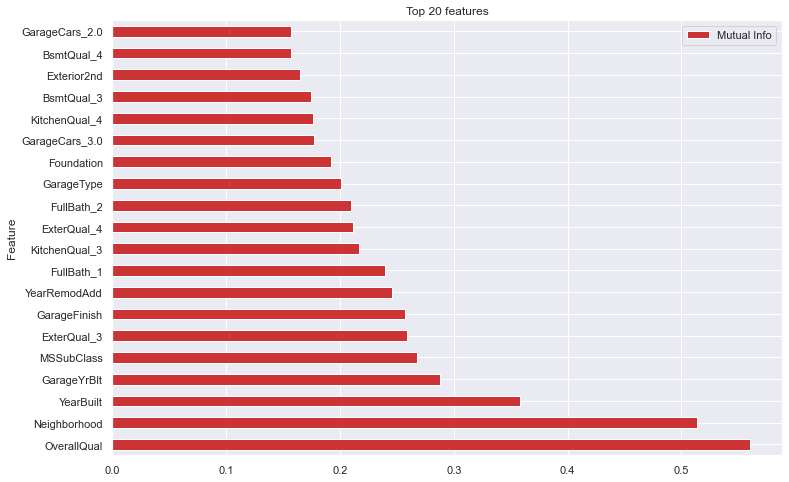

In [58]:
mi_df[:20].plot(kind = 'barh', x = 'Feature', y = 'Mutual Info', figsize = (12,8), title = 'Top 20 features')

In [59]:
low_mi_df = mi_df[abs(mi_df['Mutual Info']) == 0]
filter_feature = sorted(list(low_mi_df['Feature']))
print("Number of low correlated features dropped: " + str(len(filter_feature)))
df_train = df_train.drop(filter_feature,axis=1)
df_test = df_test.drop(filter_feature,axis=1)

Number of low correlated features dropped: 5842


In [60]:
print('-'*60)
print('Train data size after Feature Selection: {}'. format(df_train.shape))
print('Test data size after Feature Selection: {}'. format(df_test.shape))
print('-'*60)

------------------------------------------------------------
Train data size after Feature Selection: (1460, 6861)
Test data size after Feature Selection: (1459, 6861)
------------------------------------------------------------


# Outlier Identification

Outliers, the one thing that statistic text books like to assume they are normal. Too bad they are usually not. A bad outlier case actually increases the variance in our model and further reduces the power of our model to grasp onto the data. Outliers cause regression model (especially linear ones) to learn a skewed understanding towards the outlier.

**Isolation Forest** much like its' name, works to isolation a tree in a huge forest. It works by randomly sampling data based on randomly selected features and potray them in a binary decision tree structure. For an outlier, there are actually less splits needed in the forest to isolate them. Conversely, a datapoint that is not an outlier will require a lot more splits to be isloted.

In [61]:
# Removing outliers using Isolation Forest
iso = IsolationForest(random_state=0)
df_without_outlier = pd.Series(iso.fit_predict(df_train), index = df_train.index)
df_train = df_train.loc[df_without_outlier.index[df_without_outlier == 1],:]

### Final Dataset before Modeling

In [62]:
final_test = df_test

In [63]:
print('-'*60)
print('Final train dataset size beofre modeling(Features): {}'. format(df_train.shape))
print('Final train dataset size beofre modeling(Target): {}'. format(y.shape))
print('Final test dataset size beofre modeling: {}'. format(final_test.shape))
print('-'*60)

------------------------------------------------------------
Final train dataset size beofre modeling(Features): (1460, 6861)
Final train dataset size beofre modeling(Target): (1460,)
Final test dataset size beofre modeling: (1459, 6861)
------------------------------------------------------------


### Train Test Split:

We will be further splitting the training dataset in order to avoid overfitting.

In [64]:
# Train dataset Feature shape
X = df_train
X.shape

(1460, 6861)

In [65]:
# Train dataset target shape
y.shape

(1460,)

In [66]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [67]:
print('-'*60)
print('Shape of Features Train Test Split: {} {})'.format(X_train.shape, X_test.shape))
print('Shape of Target Train Test Split: {} {}'.format(y_train.shape, y_test.shape))
print('-'*60)

------------------------------------------------------------
Shape of Features Train Test Split: (978, 6861) (482, 6861))
Shape of Target Train Test Split: (978,) (482,)
------------------------------------------------------------


# Modeling

In this section, we will be applying different modeling techniques to our datasets. Due to high skewness and outliers in the dataset, the normal use of any machine learning model will be giving us an over-fitted model. Therefore, we will be using the technique known as **Ensemble Techniques** to perform machine learning on our model. In this technique, we will be stacking multiple models to predict our target based on the average of the model. The models we will be using are **Lasso, Huber, SVR, XGB, RANSAC** and **Stacked regressor**.

I tried out different models and decided to stick with them. The performance of the models will later be averaged out (ensemble model) and we will also implement a stacked regressor at the same time.

A stacked regressor is a type of Level 1 ensemble model that generalizes the predictions made by different models to get the final output. You can study more information regarding stacked models here: ["https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/"](https://www.analyticsvidhya.com/blog/2020/12/improve-predictive-model-score-stacking-regressor/)


## RandomizedSearchCV:

We will be using randomized search to find the best parameters of all the models to use them in Stacked Regressor.

*Note: Due to lack of technical requirements we will be assuming the ideal parameters of the XGBoost Regressor.*

In [68]:
# Creating a function of RandomizedSearchCV
def search_random(model, paras):
  refine_model = RandomizedSearchCV(estimator = model, param_distributions = paras, scoring = 'neg_mean_squared_error',
                                    n_iter = 10, cv = 5, verbose = 2, random_state = 38, n_jobs = 2)
  refine_model.fit(X, y)
  return(refine_model, refine_model.best_estimator_, refine_model.best_params_)

### Defining Parameters:

* **Lasso Regression:**

**Lasso regression** is the regularisation technique that performs L1 regularisation. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the summation of the absolute value of coefficients.

In [69]:
parameters = {'alpha': [0.05, 0.0005, 0.00005, 0.005, 0.000005]}
result = search_random(Lasso(), parameters)

lassomodel = result[0]
lasso_estimator = result[1]
lasso_parameters = result[2]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:   58.2s finished


In [70]:
print('-'*60)
print('LASSO MODEL:')
print('-'*60)
print('Best Estimators:\n', lasso_estimator)
print('Best Parameters:\n', lasso_parameters)
print('-'*60)

------------------------------------------------------------
LASSO MODEL:
------------------------------------------------------------
Best Estimators:
 Lasso(alpha=0.0005)
Best Parameters:
 {'alpha': 0.0005}
------------------------------------------------------------


* **Huber Regression:**

L2-regularized linear regression model that is robust to outliers.

The **Huber Regressor** optimizes the squared loss for the samples where,

$$|(y - Xw - c) / sigma| < epsilon$$ 

and, the absolute loss for the samples where

$$|(y - Xw - c) / sigma| > epsilon$$ 

Where the model coefficients w, the intercept c and the scale sigma are parameters to be optimized. The parameter sigma makes sure that if y is scaled up or down by a certain factor, one does not need to rescale epsilon to achieve the same robustness. Note that this does not take into account the fact that the different features of X may be of different scales.

This function is identical to the least squares penalty for small residuals, but on large residuals, its penalty is lower and increases linearly rather than quadratically. It is thus more forgiving of outliers.

In [75]:
parameters = {'alpha':[25,30,35,20], 'epsilon': [2,3,4,5], 'max_iter': [1000,2000,5000,8000]}
result1 = search_random(HuberRegressor(), parameters)

hubermodel = result1[0]
huber_estimator = result1[1]
huber_parameters = result1[2]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 25.4min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 32.5min finished


In [76]:
print('-'*60)
print('HUBER MODEL:')
print('-'*60)
print('Best Estimators:\n', huber_estimator)
print('Best Parameters:\n', huber_parameters)
print('-'*60)

------------------------------------------------------------
HUBER MODEL:
------------------------------------------------------------
Best Estimators:
 HuberRegressor(alpha=35, epsilon=2, max_iter=1000)
Best Parameters:
 {'max_iter': 1000, 'epsilon': 2, 'alpha': 35}
------------------------------------------------------------


* **SVR:**

**SVR** has an edge over traditional linear regression in that it can handle non-i.i.d. information sets and can model non-linear relationships. The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.

In [77]:
parameters = {'C': [5,8,10,15], 'epsilon': [0.0005, 0.025,0.005,0.05], 'kernel': ['linear','sigmoid','rbf']}
result2 = search_random(SVR(), parameters)

svrmodel = result2[0]
svr_estimator = result2[1]
svr_parameters = result2[2]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  4.9min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  6.5min finished


In [78]:
print('-'*60)
print('SVR MODEL:')
print('-'*60)
print('Best Estimators:\n', svr_estimator)
print('Best Parameters:\n', svr_parameters)
print('-'*60)

------------------------------------------------------------
SVR MODEL:
------------------------------------------------------------
Best Estimators:
 SVR(C=8, epsilon=0.025)
Best Parameters:
 {'kernel': 'rbf', 'epsilon': 0.025, 'C': 8}
------------------------------------------------------------


* **XGB Regressor:**

**Extreme Gradient Boosting (XGBoost)** is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm. XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [79]:
xgbmodel = XGBRegressor(alpha = 3, objective = 'reg:squarederror', colsample_bytree = 0.5, reg_lambda = 3, learning_rate = 0.01,
                        max_depth = 3, n_estimators = 10000, subsample = 0.65)

In [80]:
xgbmodel.fit(X, y)

print('-'*60)
print('XGB MODEL:')
print('-'*60)
print(xgbmodel)
print('Parameters:\n', xgbmodel.get_xgb_params)
print('-'*60)

------------------------------------------------------------
XGB MODEL:
------------------------------------------------------------
XGBRegressor(alpha=3, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=3, ...)
Parameters:
 <bound method XGBModel.get_xgb_params of XGBRegressor(alpha=3, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsam

* **RANSAC Regressor:**

**RANSAC (RANdom SAmple Consensus)** algorithm takes linear regression algorithm to the next level by excluding the outliers in the training dataset. It is an iterative algorithm for the robust estimation of parameters from a subset of inliers from the complete data set.

In [81]:
parameters = {'base_estimator': [LinearRegression(), Ridge(), KernelRidge()],'min_samples': [250,50,150,500],
              'max_trials':[100,200,300], 'residual_threshold': [10,20,5]}
result3 = search_random(RANSACRegressor(), parameters)

ransacmodel = result3[0]
ransac_estimator = result3[1]
ransac_parameters = result3[2]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   44.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.0min finished


In [82]:
print('-'*60)
print('RANSAC MODEL:')
print('-'*60)
print('Best Estimators:\n', ransac_estimator)
print('Best Parameters:\n', ransac_parameters)
print('-'*60)

------------------------------------------------------------
RANSAC MODEL:
------------------------------------------------------------
Best Estimators:
 RANSACRegressor(base_estimator=Ridge(), max_trials=300, min_samples=250,
                residual_threshold=5)
Best Parameters:
 {'residual_threshold': 5, 'min_samples': 250, 'max_trials': 300, 'base_estimator': Ridge()}
------------------------------------------------------------


* **Stacking Regressor:**

**Stacking regressions** is a method for forming linear combinations of different predictors to give improved. prediction accuracy. The idea is to use cross-validation data and least squares under non-negativity constraints. to determine the coefficients in the combination.

In [83]:
estimators = [('lassomodel', lasso_estimator),
              ('hubermodel', huber_estimator),
              ('svrmodel', svr_estimator), 
              ('xgbmodel', XGBRegressor(alpha = 3, objective = 'reg:squarederror', colsample_bytree = 0.5, reg_lambda = 3,
                                        learning_rate = 0.01, max_depth = 3, n_estimators = 10000, subsample = 0.65)), 
              ('ransacmodel', ransac_estimator)]

stackmodel = StackingRegressor(estimators = estimators, final_estimator = XGBRegressor(objective = 'reg:squarederror', 
                                                                                   n_estimators = 1000, learning_rate = 0.02))

## Fitting and Prediciton of Model on Training Data

In [84]:
# Fitting using Stack Regressor
stackmodel.fit(X_train, y_train)

StackingRegressor(estimators=[('lassomodel', Lasso(alpha=0.0005)),
                              ('hubermodel',
                               HuberRegressor(alpha=35, epsilon=2,
                                              max_iter=1000)),
                              ('svrmodel', SVR(C=8, epsilon=0.025)),
                              ('xgbmodel',
                               XGBRegressor(alpha=3, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5,
                                            early_stopping_rounds=None,
                                            enable_categori...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                   

In [85]:
print('-'*30)
print('Overview of model performance')    
print('-'*30)
for i, j in zip([lassomodel,hubermodel,svrmodel,ransacmodel, xgbmodel, stackmodel], 
                ['Lasso Regressor', 'Huber Regressor', 'SVR Regressor', 'RANSAC Regressor', ' ', ' ']):
    print('\n')
    print('-'*120)
    print(j, '\n')
    print(i)
    print('\n')
    print('RMSLE of Development train set: ')
    print(metrics.mean_squared_error(y_train,i.predict(X_train), squared=False))
    print('RMSLE of Development test set: ')
    print(metrics.mean_squared_error(y_test,i.predict(X_test), squared=False))
    print("\n")
print('-'*60)
print('RMSLE of Development train set using ensemble model: ')
fit = (xgbmodel.predict(X_train) + ransacmodel.predict(X_train) + lassomodel.predict(X_train)
       + hubermodel.predict(X_train) + svrmodel.predict(X_train) + stackmodel.predict(X_train)) / 6
print(metrics.mean_squared_error(y_train,fit, squared=False))
print('-'*60)

------------------------------
Overview of model performance
------------------------------


------------------------------------------------------------------------------------------------------------------------
Lasso Regressor 

RandomizedSearchCV(cv=5, estimator=Lasso(), n_jobs=2,
                   param_distributions={'alpha': [0.05, 0.0005, 5e-05, 0.005,
                                                  5e-06]},
                   random_state=38, scoring='neg_mean_squared_error',
                   verbose=2)


RMSLE of Development train set: 
0.14098686328230695
RMSLE of Development test set: 
0.14969695075585968




------------------------------------------------------------------------------------------------------------------------
Huber Regressor 

RandomizedSearchCV(cv=5, estimator=HuberRegressor(), n_jobs=2,
                   param_distributions={'alpha': [25, 30, 35, 20],
                                        'epsilon': [2, 3, 4, 5],
                               

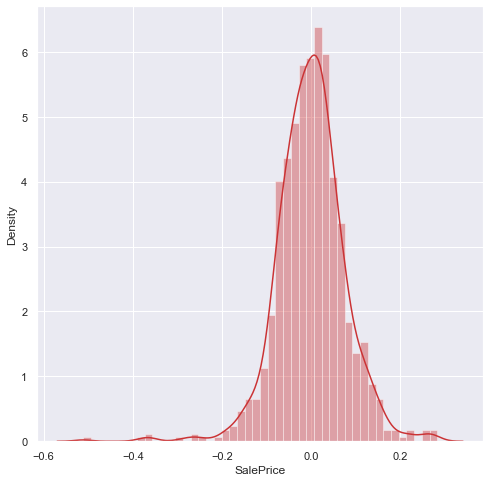

In [86]:
# Distplot of train values predictions                                                        
plt.figure(figsize = (8,8))
sns.distplot(y_train-fit)
plt.show()

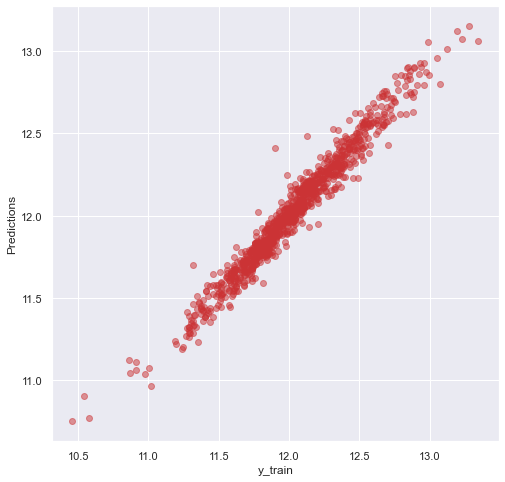

In [87]:
# Scatter Plot for better understanding
plt.figure(figsize = (8,8))
plt.scatter(y_train, fit, alpha = 0.5)
plt.xlabel("y_train")
plt.ylabel("Predictions")
plt.show()

In [88]:
print('-'*60)
print('RMSLE   :', metrics.mean_squared_error(y_train, fit, squared = False))
print('RMSE    :', np.sqrt(metrics.mean_squared_error(y_train, fit, squared = False)))
print('R2 Score:', metrics.r2_score(y_train, fit))
print('-'*60)

------------------------------------------------------------
RMSLE   : 0.07644652033254927
RMSE    : 0.27648963874356897
R2 Score: 0.9620472094480169
------------------------------------------------------------


## Testing the model

Testing the model using the testing data we get from train test split. We will also be assigning weights to our model based on there performance in order to get better predictions.

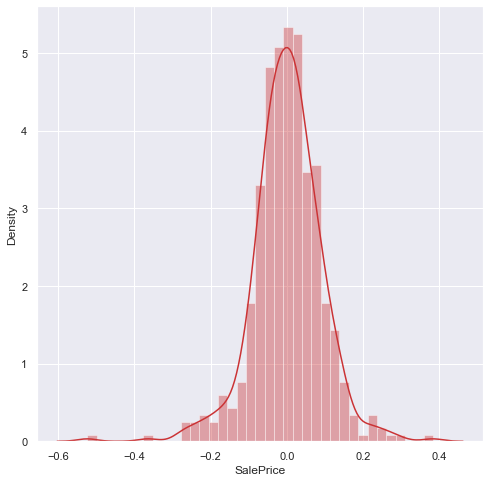

In [92]:
prediction = (xgbmodel.predict(X_test) +  3 * ransacmodel.predict(X_test) + 5 * stackmodel.predict(X_test) +
              2 * hubermodel.predict(X_test) + 4 * svrmodel.predict(X_test)) / 15
                                                        
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

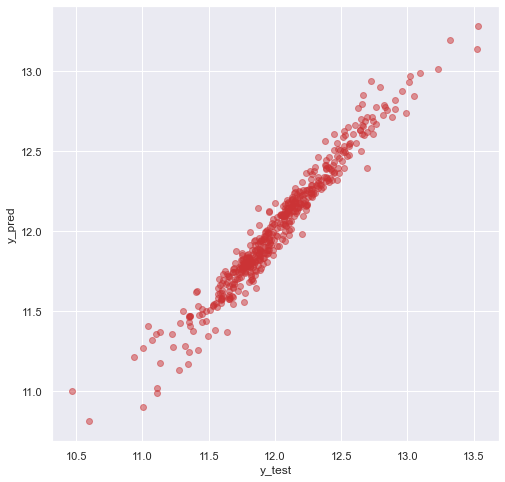

In [93]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [94]:
print('-'*60)
print('RMSLE   :', metrics.mean_squared_error(y_test, prediction, squared = False))
print('RMSE    :', np.sqrt(metrics.mean_squared_error(y_test, prediction, squared = False)))
print('R2 Score:', metrics.r2_score(y_test, prediction))
print('-'*60)

------------------------------------------------------------
RMSLE   : 0.09036965028758176
RMSE    : 0.3006154525096502
R2 Score: 0.9520817144451279
------------------------------------------------------------


## Final Prediction

In [100]:
prediction = (xgbmodel.predict(final_test) + 3 * ransacmodel.predict(final_test) + 5 * stackmodel.predict(final_test) +
              2 * hubermodel.predict(final_test) + 4 * svrmodel.predict(final_test)) / 15

In [102]:
final_prediction = np.expm1(prediction)

# Submission

In [104]:
submission = pd.DataFrame({'ID': test_Id, 'SalePrice': final_prediction})
submission.to_csv('submission.csv', index = False)